In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

In [61]:
df = pd.read_csv("/content/sample_data/clean_data.csv")
df.head()

,id_visitor,dim_session_number,dim_user_agent,dim_device_app_combo,ds,ts_min,ts_max,did_search,sent_message,sent_booking_request,...,next_ds,next_ts_min,next_ts_max,next_did_search,next_sent_message,next_sent_booking_request,year,month,day,hour
0,ed1329a6-064d-47e9-93bc-93f5a50822df,83,Airbnb/6.0 iPhone/8.1.2,iPhone - iOS,2015-02-16,2015-02-16 21:50:41,2015-02-16 22:13:42,0,0,0,...,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0.0,0.0,0.0,2015,2,16,21
1,ed1329a6-064d-47e9-93bc-93f5a50822df,84,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0,0,0,...,2015-02-18,2015-02-18 13:02:13,2015-02-18 13:05:36,0.0,0.0,0.0,2015,2,18,11
2,ed1329a6-064d-47e9-93bc-93f5a50822df,85,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 13:02:13,2015-02-18 13:05:36,0,0,0,...,2015-02-18,2015-02-18 14:18:17,2015-02-18 14:28:47,0.0,0.0,0.0,2015,2,18,13
3,ed1329a6-064d-47e9-93bc-93f5a50822df,86,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 14:18:17,2015-02-18 14:28:47,0,0,0,...,2015-02-19,2015-02-19 12:24:57,2015-02-19 12:24:59,0.0,0.0,0.0,2015,2,18,14
4,ed1329a6-064d-47e9-93bc-93f5a50822df,87,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-19,2015-02-19 12:24:57,2015-02-19 12:24:59,0,0,0,...,2015-02-19,2015-02-19 22:21:58,2015-02-19 22:22:02,0.0,0.0,0.0,2015,2,19,12


In [62]:
df_pengunjung = df.iloc[:,0:10]
df_pengunjung.head(2)

,id_visitor,dim_session_number,dim_user_agent,dim_device_app_combo,ds,ts_min,ts_max,did_search,sent_message,sent_booking_request
0,ed1329a6-064d-47e9-93bc-93f5a50822df,83,Airbnb/6.0 iPhone/8.1.2,iPhone - iOS,2015-02-16,2015-02-16 21:50:41,2015-02-16 22:13:42,0,0,0
1,ed1329a6-064d-47e9-93bc-93f5a50822df,84,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0,0,0


In [63]:
df_pengunjung['ts_min'] = pd.to_datetime(df_pengunjung['ts_min'])
df_pengunjung['hour'] = df_pengunjung['ts_min'].dt.hour
df_pengunjung.head(2)

,id_visitor,dim_session_number,dim_user_agent,dim_device_app_combo,ds,ts_min,ts_max,did_search,sent_message,sent_booking_request,hour
0,ed1329a6-064d-47e9-93bc-93f5a50822df,83,Airbnb/6.0 iPhone/8.1.2,iPhone - iOS,2015-02-16,2015-02-16 21:50:41,2015-02-16 22:13:42,0,0,0,21
1,ed1329a6-064d-47e9-93bc-93f5a50822df,84,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2015-02-18,2015-02-18 11:57:15,2015-02-18 12:12:48,0,0,0,11


In [64]:
df_pengunjung.columns

Index(['id_visitor', 'dim_session_number', 'dim_user_agent',
       'dim_device_app_combo', 'ds', 'ts_min', 'ts_max', 'did_search',
       'sent_message', 'sent_booking_request', 'hour'],
      dtype='object')

In [65]:
df_pengunjung.drop(['ds'	,'ts_min',	'ts_max'], inplace=True, axis=1)

In [66]:
encoder = OneHotEncoder()
onehot = encoder.fit_transform(df_pengunjung[['dim_device_app_combo']])

In [67]:
df_pengunjung['dim_device_app_combo'] = onehot.toarray().tolist()
df_pengunjung

,id_visitor,dim_session_number,dim_user_agent,dim_device_app_combo,did_search,sent_message,sent_booking_request,hour
0,ed1329a6-064d-47e9-93bc-93f5a50822df,83,Airbnb/6.0 iPhone/8.1.2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0,0,21
1,ed1329a6-064d-47e9-93bc-93f5a50822df,84,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",0,0,0,11
2,ed1329a6-064d-47e9-93bc-93f5a50822df,85,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",0,0,0,13
3,ed1329a6-064d-47e9-93bc-93f5a50822df,86,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",0,0,0,14
4,ed1329a6-064d-47e9-93bc-93f5a50822df,87,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",0,0,0,12
...,...,...,...,...,...,...,...,...
6776,1414271365_EuFmeZ+vsDuryP8F,1,Mozilla/5.0 (iPad; CPU OS 7_1_2 like Mac OS X)...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0,0,21
6777,1414271365_EuFmeZ+vsDuryP8F,2,Mozilla/5.0 (iPad; CPU OS 7_1_2 like Mac OS X)...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,0,0,20
6778,1414271365_EuFmeZ+vsDuryP8F,3,Mozilla/5.0 (iPad; CPU OS 7_1_2 like Mac OS X)...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,0,0,6
6779,1414271365_EuFmeZ+vsDuryP8F,4,Mozilla/5.0 (iPad; CPU OS 7_1_2 like Mac OS X)...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,0,0,3


In [68]:
df_pengunjung.drop(['dim_user_agent'], inplace=True, axis=1)

<ipython-input-69-baabc7b89437>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_pengunjung.corr(), annot=True, cmap="YlGnBu")


<Axes: >

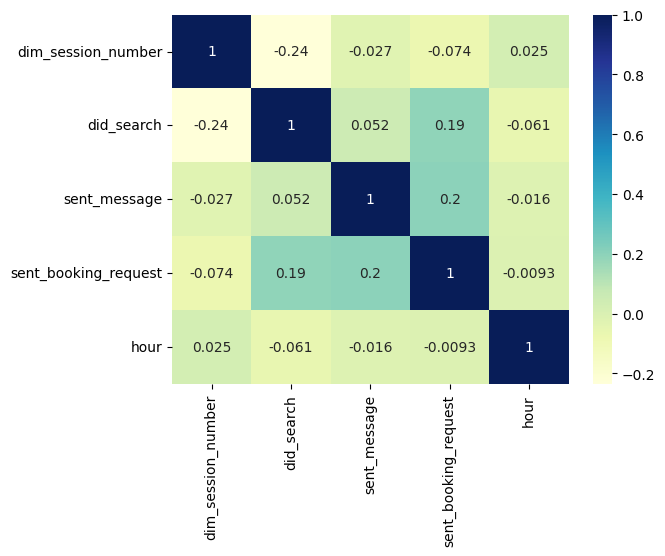

In [69]:
sns.heatmap(df_pengunjung.corr(), annot=True, cmap="YlGnBu")

In [70]:
df_pengunjung

,id_visitor,dim_session_number,dim_device_app_combo,did_search,sent_message,sent_booking_request,hour
0,ed1329a6-064d-47e9-93bc-93f5a50822df,83,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0,0,21
1,ed1329a6-064d-47e9-93bc-93f5a50822df,84,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",0,0,0,11
2,ed1329a6-064d-47e9-93bc-93f5a50822df,85,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",0,0,0,13
3,ed1329a6-064d-47e9-93bc-93f5a50822df,86,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",0,0,0,14
4,ed1329a6-064d-47e9-93bc-93f5a50822df,87,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...",0,0,0,12
...,...,...,...,...,...,...,...
6776,1414271365_EuFmeZ+vsDuryP8F,1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,0,0,21
6777,1414271365_EuFmeZ+vsDuryP8F,2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,0,0,20
6778,1414271365_EuFmeZ+vsDuryP8F,3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,0,0,6
6779,1414271365_EuFmeZ+vsDuryP8F,4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,0,0,3


In [71]:
df_pengunjung.drop(['id_visitor'], inplace=True, axis=1)